<a href="https://colab.research.google.com/github/maiaufrrj/BRtrading/blob/main/All_Assets_IBOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## referências:
https://julian-west.github.io/blog/visualising-asset-price-correlations/

In [ ]:
!pip install yfinance
!pip install networkx
!pip install plotly

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import plotly.graph_objs as go
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.core.display import display, HTML

In [ ]:
lista_ibov = pd.read_csv('https://raw.githubusercontent.com/maiaufrrj/BRtrading/main/lista_ibov.csv')['lista_ibov']

In [ ]:
lista_acoes=[]
for i in range(len(lista_ibov)):
  lista_acoes.append(lista_ibov[i]+'.SA')
lista_ibov = list(lista_acoes)
del lista_acoes

In [ ]:
df = pd.DataFrame()
for acao in lista_ibov:
  df[acao] = yf.download(acao, start='2011-10-11', end='2021-10-11')['Adj Close']

In [ ]:
df.head()

,ALPA4.SA,ABEV3.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BIDI4.SA,BIDI11.SA,BPAN4.SA,BBSE3.SA,BRML3.SA,BBDC3.SA,BBDC4.SA,BRAP4.SA,BBAS3.SA,BRKM5.SA,BRFS3.SA,BPAC11.SA,CRFB3.SA,CCRO3.SA,CMIG4.SA,CIEL3.SA,COGN3.SA,CPLE6.SA,CSAN3.SA,CPFE3.SA,CVCB3.SA,CYRE3.SA,DXCO3.SA,ECOR3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,ENGI11.SA,ENEV3.SA,EGIE3.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,...,ITUB4.SA,JBSS3.SA,JHSF3.SA,KLBN11.SA,RENT3.SA,LCAM3.SA,LWSA3.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,CASH3.SA,BEEF3.SA,MRVE3.SA,MULT3.SA,PCAR3.SA,PETR3.SA,PETR4.SA,BRDT3.SA,PRIO3.SA,PETZ3.SA,QUAL3.SA,RADL3.SA,RDOR3.SA,RAIL3.SA,SBSP3.SA,SANB11.SA,CSNA3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,VIVT3.SA,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIIA3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-10-11,5.059282,6.569533,12.758772,NaN,NaN,2.214955,NaN,NaN,5.850858,NaN,10.666301,6.051642,8.178238,17.758062,12.435691,9.604571,29.656166,NaN,NaN,8.039604,5.173902,6.177439,NaN,1.714454,4.156450,12.547844,NaN,8.742811,5.638067,8.730917,8.902015,10.894189,10.756244,7.133990,6.717348,128.006470,11.146429,1.886346,6.554032,7.463648,...,9.272738,3.364244,3.306381,NaN,5.607032,NaN,NaN,7.047037,7.196977,0.328022,6.453938,NaN,4.036728,5.945780,9.874561,65.060448,16.553282,14.451528,NaN,15.400000,NaN,8.797503,2.043963,NaN,NaN,11.223273,7.347337,8.594373,7.365310,14.743343,4.487735,21.037521,6.553448,7.894196,13.200878,9.688379,25.217052,4.206393,2.317614,4.510776
2011-10-13,5.119788,6.576691,12.410319,NaN,NaN,2.221688,NaN,NaN,5.615010,NaN,10.490698,6.077726,8.369029,17.928307,12.542207,9.637806,30.800310,NaN,NaN,8.053189,5.116716,6.119136,NaN,1.722165,4.236088,12.955602,NaN,9.159134,5.515501,8.567661,8.885789,11.035925,10.885392,7.103023,NaN,130.693970,11.436662,1.886346,6.511321,7.481128,...,9.378454,3.465171,3.424467,NaN,5.491245,NaN,NaN,7.168957,7.356700,0.337314,6.574658,NaN,3.986058,5.918506,10.053287,NaN,16.744280,14.625004,NaN,15.700000,NaN,8.670006,2.049414,NaN,NaN,11.560721,7.580330,8.618017,7.248168,NaN,NaN,21.264742,6.857143,7.744570,13.621713,9.697343,25.702440,NaN,2.353997,4.491046
2011-10-14,5.119788,6.540908,12.955336,NaN,NaN,2.212711,NaN,NaN,5.714793,NaN,10.739938,6.116854,8.351687,17.944263,12.616772,9.943556,30.571482,NaN,NaN,8.005638,5.156149,6.163560,NaN,1.717024,4.264893,12.788791,NaN,9.395051,5.515501,8.789688,8.907422,11.084799,10.894618,7.137859,6.936053,131.872070,11.424042,1.886346,6.644205,7.411211,...,9.484167,3.456761,3.424467,NaN,5.553427,NaN,NaN,7.251863,7.256533,0.344635,6.713953,NaN,3.960722,6.076695,10.056081,NaN,17.038740,14.813566,NaN,15.900000,NaN,8.612632,2.142073,NaN,NaN,11.443241,7.688696,8.742145,7.174952,NaN,NaN,21.373409,6.833168,7.705778,13.533116,9.984140,25.743385,NaN,2.335805,4.582296
2011-10-17,5.119788,6.526596,12.642621,NaN,NaN,2.183538,NaN,NaN,5.669437,NaN,10.592661,6.064689,8.325673,17.263308,12.488949,9.790681,30.937605,NaN,NaN,7.981863,5.118927,6.178829,NaN,1.641454,4.234393,12.727009,NaN,9.186889,5.343907,8.567661,8.977731,11.021262,10.747019,7.238503,6.936053,131.172577,11.461896,1.871322,6.468607,7.376251,...,9.453967,3.389476,3.306381,NaN,5.392613,NaN,NaN,7.090928,7.146896,0.336469,6.639662,NaN,3.952278,5.858502,9.941586,NaN,16.672651,14.557124,NaN,15.000000,NaN,8.670006,2.071216,NaN,NaN,11.273266,7.591165,8.287009,7.028524,NaN,4.493021,22.474934,6.833168,7.980094,13.776759,9.518093,24.553301,NaN,2.280018,4.463916
2011-10-19,5.068591,6.784225,12.955336,NaN,NaN,2.214955,NaN,NaN,5.787362,NaN,10.762599,6.208153,8.441304,16.874949,12.829800,9.205767,31.761393,NaN,NaN,8.117723,5.390792,6.255178,NaN,1.681038,4.461447,13.042097,NaN,9.693418,5.558400,8.717855,8.945281,11.109235,11.420436,7.135925,6.936053,133.491928,11.398804,1.886346,6.620474,7.544053,...,9.665399,3.591331,3.424467,NaN,5.531986,NaN,NaN,7.656641,7.668025,0.350547,7.066830,NaN,4.070508,6.245795,9.955545,NaN,16.672651,14.504324,NaN,16.360001,NaN,8.918631,2.129355,NaN,NaN,11.495732,7.900014,8.281096,7.018763,NaN,4

In [ ]:
#calculate correlation matrix using inbuilt pandas function
correlation_matrix = df.corr()

#show first five rows of the correlation matrix 
correlation_matrix.head()

,ALPA4.SA,ABEV3.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BIDI4.SA,BIDI11.SA,BPAN4.SA,BBSE3.SA,BRML3.SA,BBDC3.SA,BBDC4.SA,BRAP4.SA,BBAS3.SA,BRKM5.SA,BRFS3.SA,BPAC11.SA,CRFB3.SA,CCRO3.SA,CMIG4.SA,CIEL3.SA,COGN3.SA,CPLE6.SA,CSAN3.SA,CPFE3.SA,CVCB3.SA,CYRE3.SA,DXCO3.SA,ECOR3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,ENGI11.SA,ENEV3.SA,EGIE3.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,...,ITUB4.SA,JBSS3.SA,JHSF3.SA,KLBN11.SA,RENT3.SA,LCAM3.SA,LWSA3.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,CASH3.SA,BEEF3.SA,MRVE3.SA,MULT3.SA,PCAR3.SA,PETR3.SA,PETR4.SA,BRDT3.SA,PRIO3.SA,PETZ3.SA,QUAL3.SA,RADL3.SA,RDOR3.SA,RAIL3.SA,SBSP3.SA,SANB11.SA,CSNA3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,VIVT3.SA,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIIA3.SA,WEGE3.SA,YDUQ3.SA
ALPA4.SA,1.000000,0.245037,0.782610,0.811339,0.362243,0.909586,0.609550,0.812149,0.854836,0.584332,0.030859,0.664832,0.643452,0.910648,0.619618,0.576528,-0.582697,0.962531,0.660914,0.276546,0.718090,-0.696650,-0.485010,0.947130,0.965610,0.839245,0.047046,0.869132,0.942327,0.533282,0.879935,0.873485,-0.303088,0.857289,0.820642,-0.256403,0.866036,0.899349,0.837435,0.711000,...,0.659865,0.885742,0.593323,0.781949,0.952002,0.955731,0.746518,0.500373,0.800221,0.940949,0.857885,0.728243,0.232829,0.836922,0.643613,-0.498565,0.682984,0.731260,0.710301,0.742068,0.740219,0.738430,0.868956,0.488487,0.756988,0.755408,0.744911,0.853713,0.828381,0.652876,0.957462,0.885935,0.686657,0.964137,-0.415359,0.642724,0.901046,0.795032,0.941766,0.712740
ABEV3.SA,0.245037,1.000000,0.150375,0.377926,0.356903,0.339913,0.205337,0.376067,-0.026027,0.372287,-0.119692,0.686537,0.632603,0.160432,0.545376,0.654552,0.017731,-0.288707,-0.384383,0.312200,-0.035719,0.299711,0.469192,0.140581,0.286786,0.342146,0.675349,0.095645,0.211616,-0.116059,0.390584,0.390855,0.459484,0.447886,0.400191,-0.756605,0.395203,0.505577,0.243027,0.579903,...,0.672396,0.358293,-0.402432,0.201279,0.346585,0.255109,0.724262,0.383693,0.551268,0.169772,-0.051261,0.625285,0.136985,0.395286,0.619747,0.318079,0.132349,0.100047,0.200313,-0.207440,0.744597,0.443612,0.537971,0.295402,-0.098648,0.379902,0.591419,0.159334,0.346395,-0.261920,0.383126,0.355139,0.352353,0.131611,0.545716,-0.062804,0.211709,-0.013513,0.220338,0.544845
AMER3.SA,0.782610,0.150375,1.000000,-0.669566,0.077605,0.897265,0.118368,-0.266577,0.562117,0.682866,-0.010446,0.615614,0.583492,0.682561,0.623105,0.361029,-0.530320,0.697065,0.605196,0.259041,0.585159,-0.606172,-0.363295,0.834133,0.815926,0.775318,-0.015754,0.799517,0.766819,0.547970,0.743211,0.735693,-0.391991,0.771838,0.802521,-0.362117,0.849828,0.815267,0.861822,0.634676,...,0.613772,0.741777,0.490779,0.629443,0.842911,0.823432,-0.312788,0.812736,0.767809,0.894410,0.611418,-0.493836,0.294707,0.809672,0.576607,-0.688094,0.561005,0.610208,0.225607,0.464905,-0.747335,0.707248,0.765338,-0.202117,0.810748,0.789228,0.641180,0.541806,0.870272,0.456699,0.765295,0.876143,0.789218,0.774820,-0.396141,0.367742,0.670732,0.873965,0.831059,0.764127
ASAI3.SA,0.811339,0.377926,-0.669566,1.000000,-0.083033,-0.745355,0.301429,0.319887,0.544631,-0.666651,-0.046053,-0.159107,-0.045880,0.110585,0.293345,0.838972,0.198403,0.557307,-0.253850,0.143138,0.834818,-0.474636,-0.454510,0.610034,0.323248,-0.145548,0.431684,-0.551773,0.800812,-0.344118,0.587096,0.606862,0.843609,-0.181731,0.243278,0.042940,-0.075161,0.792194,-0.540955,-0.431944,...,0.330976,0.743353,0.091272,-0.853723,-0.051328,0.381171,-0.204926,-0.713599,-0.196497,-0.690152,0.801823,0.529331,0.084738,-0.623025,-0.228803,0.139229,0.798883,0.806614,0.703758,0.467446,0.717471,-0.695748,0.249555,0.592758,-0.336258,-0.427509,0.072993,-0.062758,-0.522836,-0.867535,0.599425,-0.163382,-0.586973,0.773430,-0.601138,0.037094,-0.001401,-0.306987,0.134765,-0.131999
AZUL4.SA,0.362243,0.356903,0.077605,-0.083033,1.000000,0.359265,0.209893,0.178262,0.464556,0.669364,0.685924,0.883531,0.848634,0.302975,0.768766,0.142059,0.226184,0.431659,0.521502,0.443960,0.666727,-0.293744,-0.047320,0.412841,0.336922,0.518444,0.305182,0.606813

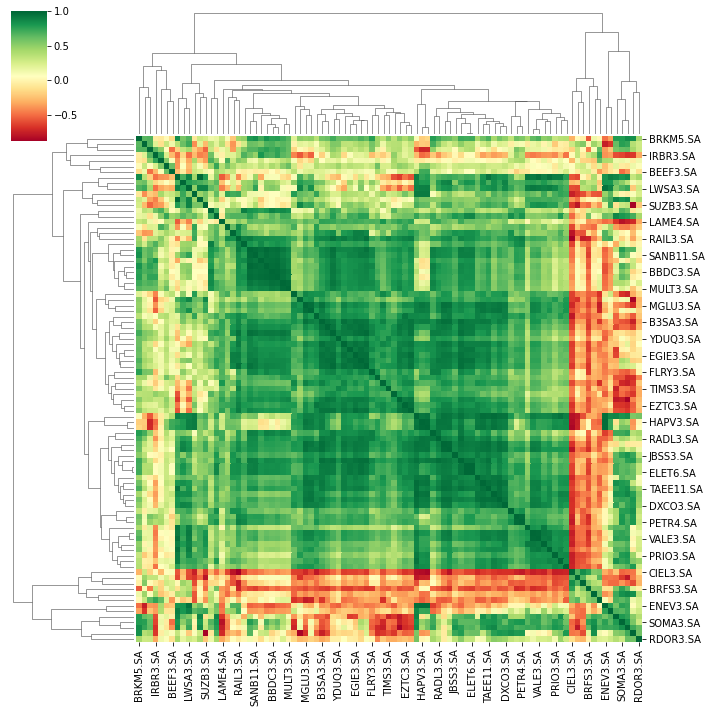

In [ ]:
#visualise correlation matrix using a clustered heatmap
display(HTML("<h3>Clustered Heatmap: Correlations between asset price returns</h3>"))
sns.clustermap(correlation_matrix, cmap="RdYlGn")
plt.show()

In [ ]:
#correlation_matrix['CMIN']

In [ ]:
raw_asset_prices_df = df

In [ ]:
# create empty dataframe for log returns information
log_returns_df = pd.DataFrame()

# calculate log returns of each asset
# loop through each column in dataframe and and calculate the daily log returns 
# add log returns column to new a dataframe
for col in raw_asset_prices_df.columns:
    # dates are given in reverse order so need to set diff to -1.
    log_returns_df[col] = np.log(raw_asset_prices_df[col]).diff(-1)
    
#check output of log returns dataframe
log_returns_df.head()

,ALPA4.SA,ABEV3.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BIDI4.SA,BIDI11.SA,BPAN4.SA,BBSE3.SA,BRML3.SA,BBDC3.SA,BBDC4.SA,BRAP4.SA,BBAS3.SA,BRKM5.SA,BRFS3.SA,BPAC11.SA,CRFB3.SA,CCRO3.SA,CMIG4.SA,CIEL3.SA,COGN3.SA,CPLE6.SA,CSAN3.SA,CPFE3.SA,CVCB3.SA,CYRE3.SA,DXCO3.SA,ECOR3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,ENGI11.SA,ENEV3.SA,EGIE3.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,...,ITUB4.SA,JBSS3.SA,JHSF3.SA,KLBN11.SA,RENT3.SA,LCAM3.SA,LWSA3.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,CASH3.SA,BEEF3.SA,MRVE3.SA,MULT3.SA,PCAR3.SA,PETR3.SA,PETR4.SA,BRDT3.SA,PRIO3.SA,PETZ3.SA,QUAL3.SA,RADL3.SA,RDOR3.SA,RAIL3.SA,SBSP3.SA,SANB11.SA,CSNA3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,VIVT3.SA,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIIA3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-10-11,-0.011889,-0.001089,0.027691,NaN,NaN,-0.003035,NaN,NaN,0.041145,NaN,0.016600,-0.004301,-0.023061,-0.009541,-0.008529,-0.003454,-0.037855,NaN,NaN,-0.001688,0.011114,0.009483,NaN,-0.004488,-0.018979,-0.031979,NaN,-0.046520,0.021979,0.018876,0.001824,-0.012926,-0.011935,0.004350,NaN,-0.020778,-0.025705,0.000000,0.006538,-0.002339,...,-0.011336,-0.029559,-0.035091,NaN,0.020867,NaN,NaN,-0.017153,-0.021950,-0.027934,-0.018532,NaN,0.012632,0.004598,-0.017938,NaN,-0.011472,-0.011933,NaN,-0.019293,NaN,0.014599,-0.002663,NaN,NaN,-0.029624,-0.031219,-0.002747,0.016032,NaN,NaN,-0.010743,-0.045300,0.019136,-0.031382,-0.000925,-0.019065,NaN,-0.015576,0.004383
2011-10-13,0.000000,0.005456,-0.042979,NaN,NaN,0.004049,NaN,NaN,-0.017615,NaN,-0.023480,-0.006417,0.002074,-0.000890,-0.005928,-0.031231,0.007457,NaN,NaN,0.005922,-0.007677,-0.007234,NaN,0.002990,-0.006777,0.012959,NaN,-0.025431,0.000000,-0.025584,-0.002432,-0.004419,-0.000847,-0.004892,NaN,-0.008974,0.001104,0.000000,-0.020203,0.009390,...,-0.011209,0.002430,0.000000,NaN,-0.011260,NaN,NaN,-0.011498,0.013709,-0.021471,-0.020965,NaN,0.006376,-0.026377,-0.000278,NaN,-0.017433,-0.012811,NaN,-0.012658,NaN,0.006640,-0.044220,NaN,NaN,0.010214,-0.014194,-0.014301,0.010153,NaN,NaN,-0.005097,0.003503,0.005022,0.006525,-0.029146,-0.001592,NaN,0.007758,-0.020115
2011-10-14,0.000000,0.002190,0.024434,NaN,NaN,0.013272,NaN,NaN,0.007968,NaN,0.013808,0.008565,0.003120,0.038687,0.010183,0.015494,-0.011905,NaN,NaN,0.002974,0.007245,-0.002474,NaN,0.045010,0.007177,0.004843,NaN,0.022406,0.031606,0.025584,-0.007862,0.005748,0.013641,-0.014001,0.00000,0.005318,-0.003308,0.007996,0.026784,0.004728,...,0.003189,0.019657,0.035091,NaN,0.029385,NaN,NaN,0.022442,0.015224,0.023979,0.011127,NaN,0.002134,0.036567,0.011451,NaN,0.021720,0.017463,NaN,0.058269,NaN,-0.006640,0.033638,NaN,NaN,0.014965,0.012766,0.053466,0.020619,NaN,NaN,-0.050253,0.000000,-0.034980,-0.017843,0.047803,0.047331,NaN,0.024173,0.026174
2011-10-17,0.010050,-0.038715,-0.024434,NaN,NaN,-0.014286,NaN,NaN,-0.020587,NaN,-0.015916,-0.023380,-0.013793,0.022753,-0.026926,0.061601,-0.026279,NaN,NaN,-0.016878,-0.051747,-0.012281,NaN,-0.023829,-0.052233,-0.024456,NaN,-0.053670,-0.039353,-0.017378,0.003621,-0.007950,-0.060776,0.014272,0.00000,-0.017527,0.005520,-0.007996,-0.023206,-0.022494,...,-0.022118,-0.057848,-0.035091,NaN,-0.025517,NaN,NaN,-0.076757,-0.070381,-0.040990,-0.062351,NaN,-0.029476,-0.064014,-0.001403,NaN,0.000000,0.003634,NaN,-0.086789,NaN,-0.028273,-0.027683,NaN,NaN,-0.019542,-0.039880,0.000714,0.001390,NaN,0.0,-0.017213,-0.011628,-0.034804,0.003543,-0.003759,0.030176,NaN,-0.021053,-0.048527
2011-10-19,0.008299,0.004228,0.006226,NaN,NaN,0.028779,NaN,NaN,-0.026297,NaN,0.034265,0.003367,0.000000,0.029433,0.012111,0.040521,0.029242,NaN,NaN,0.011573,0.003295,0.000222,NaN,0.010143,-0.006436,0.000000,NaN,0.037190,0.055538,0.018141,0.012778,0.000440,0.026188,-0.002167,0.00905,0.009699,-0.002580,0.008889,0.007194,0.004644,...,0.012579,0.018913,0.013889,NaN,0.008173,NaN,NaN,0.045610,0.057398,-0.001605,0.027983,NaN,-0.036664,0.016733,0.018973,NaN,0.023666,0.021551,NaN,-0.002198,NaN,0.002863,-0.006803,NaN,NaN,0.028451,0.005502,0.023836,

In [ ]:
#calculate correlation matrix using inbuilt pandas function
correlation_matrix = log_returns_df.corr()

#show first five rows of the correlation matrix 
correlation_matrix.head()

,ALPA4.SA,ABEV3.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BIDI4.SA,BIDI11.SA,BPAN4.SA,BBSE3.SA,BRML3.SA,BBDC3.SA,BBDC4.SA,BRAP4.SA,BBAS3.SA,BRKM5.SA,BRFS3.SA,BPAC11.SA,CRFB3.SA,CCRO3.SA,CMIG4.SA,CIEL3.SA,COGN3.SA,CPLE6.SA,CSAN3.SA,CPFE3.SA,CVCB3.SA,CYRE3.SA,DXCO3.SA,ECOR3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,ENGI11.SA,ENEV3.SA,EGIE3.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,...,ITUB4.SA,JBSS3.SA,JHSF3.SA,KLBN11.SA,RENT3.SA,LCAM3.SA,LWSA3.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,CASH3.SA,BEEF3.SA,MRVE3.SA,MULT3.SA,PCAR3.SA,PETR3.SA,PETR4.SA,BRDT3.SA,PRIO3.SA,PETZ3.SA,QUAL3.SA,RADL3.SA,RDOR3.SA,RAIL3.SA,SBSP3.SA,SANB11.SA,CSNA3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,VIVT3.SA,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIIA3.SA,WEGE3.SA,YDUQ3.SA
ALPA4.SA,1.000000,0.286827,0.258989,0.284669,0.501432,0.364107,0.063444,0.359351,0.267516,0.273622,0.394328,0.357241,0.364531,0.202444,0.349403,0.268753,0.247327,0.424762,0.310677,0.356805,0.293849,0.240305,0.303571,0.320132,0.345009,0.266636,0.409570,0.451941,0.367597,0.355825,0.278615,0.276124,0.207210,0.262383,0.344735,0.183284,0.244943,0.295077,0.441515,0.324569,...,0.334864,0.273843,0.304035,0.210953,0.384960,0.309293,0.407277,0.284116,0.414923,0.280491,0.269995,0.351812,0.223563,0.364627,0.399202,0.132117,0.336118,0.343598,0.432871,0.264457,0.359635,0.308386,0.271206,0.312419,0.267113,0.302880,0.310345,0.248369,0.334228,0.154173,0.222980,0.231938,0.251087,0.300120,0.372643,0.263210,0.195481,0.297274,0.308041,0.294178
ABEV3.SA,0.286827,1.000000,0.230868,0.269394,0.490963,0.403096,0.075082,0.301473,0.253299,0.403571,0.402262,0.491891,0.469230,0.273796,0.393824,0.305242,0.352069,0.386956,0.388422,0.396684,0.357216,0.364032,0.381734,0.380980,0.380504,0.375972,0.410760,0.405120,0.360012,0.377512,0.305977,0.312305,0.330050,0.327585,0.329158,0.154821,0.355538,0.341522,0.377298,0.284330,...,0.459682,0.247280,0.300434,0.293178,0.361747,0.262495,0.264679,0.343481,0.421431,0.238660,0.253194,0.163738,0.216637,0.337591,0.416366,0.026107,0.372036,0.366755,0.451603,0.207198,0.119290,0.272994,0.328098,0.183231,0.302313,0.373606,0.423242,0.304454,0.286537,0.160606,0.221625,0.295208,0.329582,0.282862,0.440849,0.261993,0.258827,0.227984,0.370595,0.312532
AMER3.SA,0.258989,0.230868,1.000000,0.184731,0.361343,0.349954,0.028055,0.378527,0.189210,0.283046,0.312439,0.314441,0.299603,0.205451,0.320766,0.223000,0.233384,0.388259,0.330060,0.298421,0.263087,0.222421,0.265590,0.329008,0.291796,0.243376,0.274527,0.358537,0.338331,0.295692,0.276967,0.275411,0.180381,0.265717,0.241948,0.138624,0.219751,0.253947,0.348368,0.227548,...,0.295736,0.204382,0.241954,0.184274,0.336785,0.175331,0.465829,0.437593,0.349769,0.328893,0.217887,0.309184,0.193698,0.329110,0.296723,0.082584,0.286000,0.302703,0.410073,0.152323,0.206297,0.248278,0.218241,0.291696,0.266193,0.276043,0.278073,0.270265,0.235619,0.083850,0.180041,0.175762,0.226936,0.263543,0.294035,0.267266,0.193896,0.335940,0.262729,0.243640
ASAI3.SA,0.284669,0.269394,0.184731,1.000000,0.252993,0.375307,0.164090,0.171783,0.249099,0.349245,0.308493,0.279433,0.268483,0.150191,0.256466,0.163224,0.214032,0.376040,0.316194,0.273531,0.192328,0.142132,0.250106,0.161114,0.311800,0.252759,0.358535,0.359283,0.357776,0.286416,0.278413,0.285945,0.197461,0.316799,0.357690,0.351584,0.431547,0.396689,0.356727,0.289160,...,0.188868,0.184578,0.357667,0.144802,0.383402,0.382829,0.245031,0.132380,0.302690,0.266877,0.083544,0.260630,0.159869,0.306758,0.337069,0.222203,0.253686,0.313491,0.313032,0.225268,0.270223,0.254471,0.311063,0.215779,0.410546,0.285593,0.192167,0.181927,0.222013,0.060411,0.237525,0.116643,0.245045,0.284090,0.349721,0.155147,0.145508,0.381953,0.268033,0.255261
AZUL4.SA,0.501432,0.490963,0.361343,0.252993,1.000000,0.540796,0.148066,0.390752,0.444247,0.443756,0.640318,0.594307,0.607105,0.332120,0.610322,0.435051,0.376521,0.527941,0.365010,0.570910,0.541106,0.408964,0.558535,0.501398,0.515062,0.458410,0.719175,0.653347,0.547834,0.588157,0.453602,0.463938,0.533784,0.458983,0.499183,0.450568,0.4

# Visualização de Redes
Networkx é uma biblioteca popular para visualizar redes de pequenas ou médias. 

##Create edge list

In [ ]:
#convert matrix to list of edges and rename the columns
edges = correlation_matrix.stack().reset_index()
edges.columns = ['asset_1','asset_2','correlation']

#remove self correlations
edges = edges.loc[edges['asset_1'] != edges['asset_2']].copy()

#show the first 5 rows of the edge list dataframe.
edges.head()

,asset_1,asset_2,correlation
1,ALPA4.SA,ABEV3.SA,0.286827
2,ALPA4.SA,AMER3.SA,0.258989
3,ALPA4.SA,ASAI3.SA,0.284669
4,ALPA4.SA,AZUL4.SA,0.501432
5,ALPA4.SA,B3SA3.SA,0.364107


In [ ]:
#create undirected graph with weights corresponding to the correlation magnitude
G0 = nx.from_pandas_edgelist(edges, 'asset_1', 'asset_2', edge_attr=['correlation'])

#print out the graph info
#check number of nodes and degrees are as expected (all should have degree = 38, i.e. average degree = 38)
print(nx.info(G0))

Graph with 91 nodes and 4095 edges


## Visualizando a rede

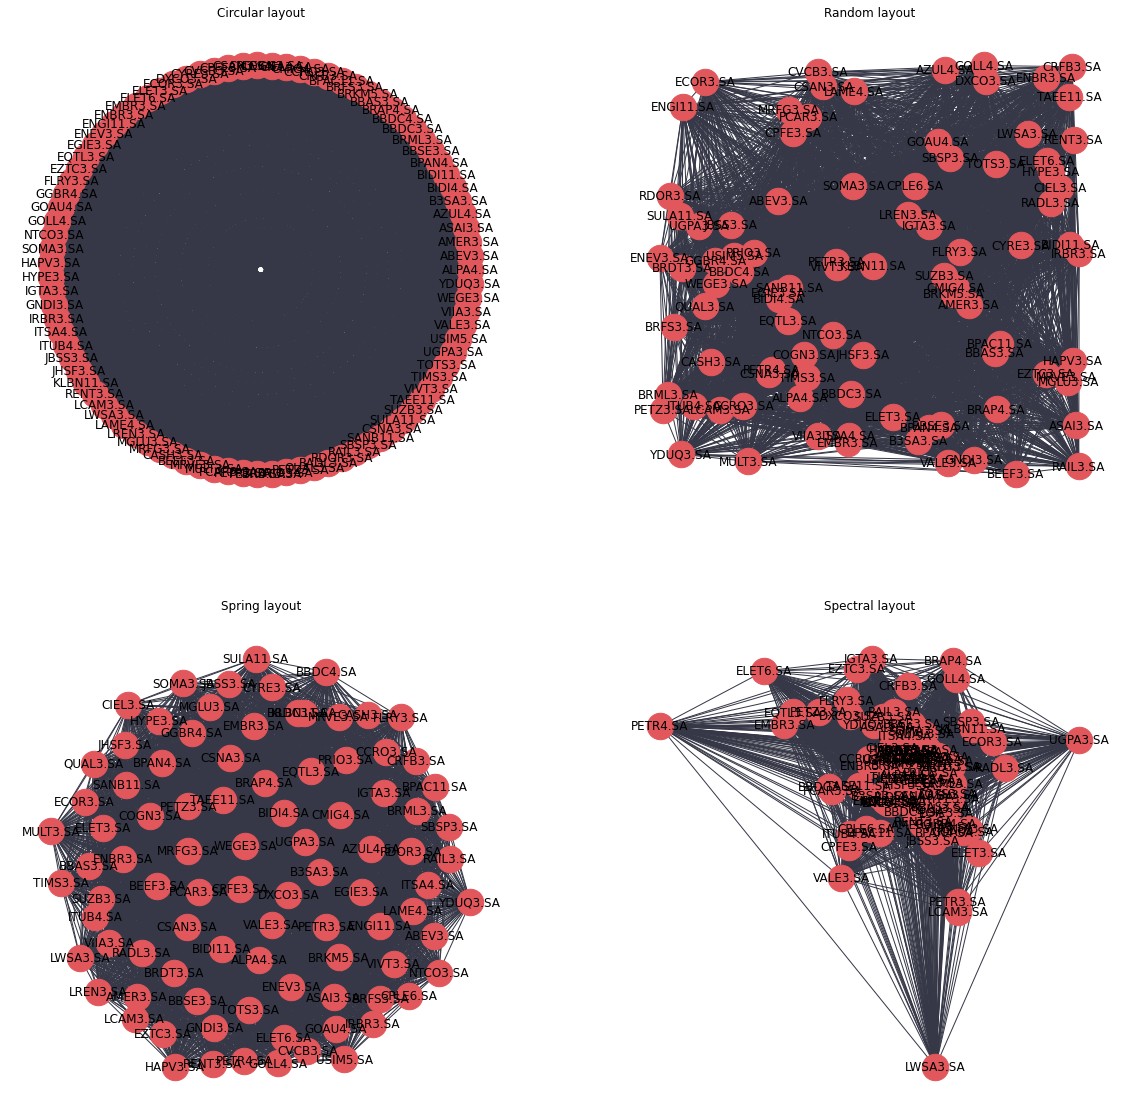

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(20,20))

nx.draw(G0, with_labels=True, node_size=700, node_color="#e1575c",
        edge_color='#363847',  pos=nx.circular_layout(G0),ax=ax[0,0])
ax[0,0].set_title("Circular layout")

nx.draw(G0, with_labels=True, node_size=700, node_color="#e1575c",
        edge_color='#363847',  pos=nx.random_layout(G0),ax=ax[0,1])
ax[0,1].set_title("Random layout")

nx.draw(G0, with_labels=True, node_size=700, node_color="#e1575c",
        edge_color='#363847',  pos=nx.spring_layout(G0),ax=ax[1,0])
ax[1,0].set_title("Spring layout")

nx.draw(G0, with_labels=True, node_size=700, node_color="#e1575c",
        edge_color='#363847',  pos=nx.spectral_layout(G0),ax=ax[1,1])
ax[1,1].set_title("Spectral layout")

plt.show()

##Melhorando a visualização da rede

* Quais ativos mostram correlações significativas entre si? (ou seja,> 0,5)

* Essas correlações são positivas ou negativas?

* Quais são os ativos mais / menos "conectados"? (ou seja, quais ativos compartilham as correlações mais / menos fortes com outros ativos no conjunto de dados)

* Quais grupos de ativos se comportam de forma semelhante? (ou seja, quais ativos estão correlacionados com o mesmo tipo de outros ativos)

* Reduzir o número de conexões entre os nós, adicionando um valor limite para a força da correlação

* Introduzir cor para significar correlações positivas ou negativas

* Dimensione a espessura da borda para indicar a magnitude da correlação

* Dimensionar o tamanho dos nós para indicar quais ativos têm o maior número de correlações fortes com o resto dos ativos no conjunto de dados

In [ ]:
#Removendo as edges abaixo de um limite

# 'winner takes all' method - set minium correlation threshold to remove some edges from the diagram
threshold = 0.5

# create a new graph from edge list
Gx = nx.from_pandas_edgelist(edges, 'asset_1', 'asset_2', edge_attr=['correlation'])

# list to store edges to remove
remove = []
# loop through edges in Gx and find correlations which are below the threshold
for asset_1, asset_2 in Gx.edges():
    corr = Gx[asset_1][asset_2]['correlation']
    #add to remove node list if abs(corr) < threshold
    if abs(corr) < threshold:
        remove.append((asset_1, asset_2))

# remove edges contained in the remove list
Gx.remove_edges_from(remove)

print(str(len(remove)) + " edges removed")

3712 edges removed


Create colour, edge thickness and node size features

In [ ]:
def assign_colour(correlation):
    if correlation <= 0:
        return "#ffa09b"  # red
    else:
        return "#9eccb7"  # green


def assign_thickness(correlation, benchmark_thickness=2, scaling_factor=3):
    return benchmark_thickness * abs(correlation)**scaling_factor


def assign_node_size(degree, scaling_factor=50):
    return degree * scaling_factor


# assign colours to edges depending on positive or negative correlation
# assign edge thickness depending on magnitude of correlation
edge_colours = []
edge_width = []
for key, value in nx.get_edge_attributes(Gx, 'correlation').items():
    edge_colours.append(assign_colour(value))
    edge_width.append(assign_thickness(value))

# assign node size depending on number of connections (degree)
node_size = []
for key, value in dict(Gx.degree).items():
    node_size.append(assign_node_size(value))

#Desenhando gráfico melhorado

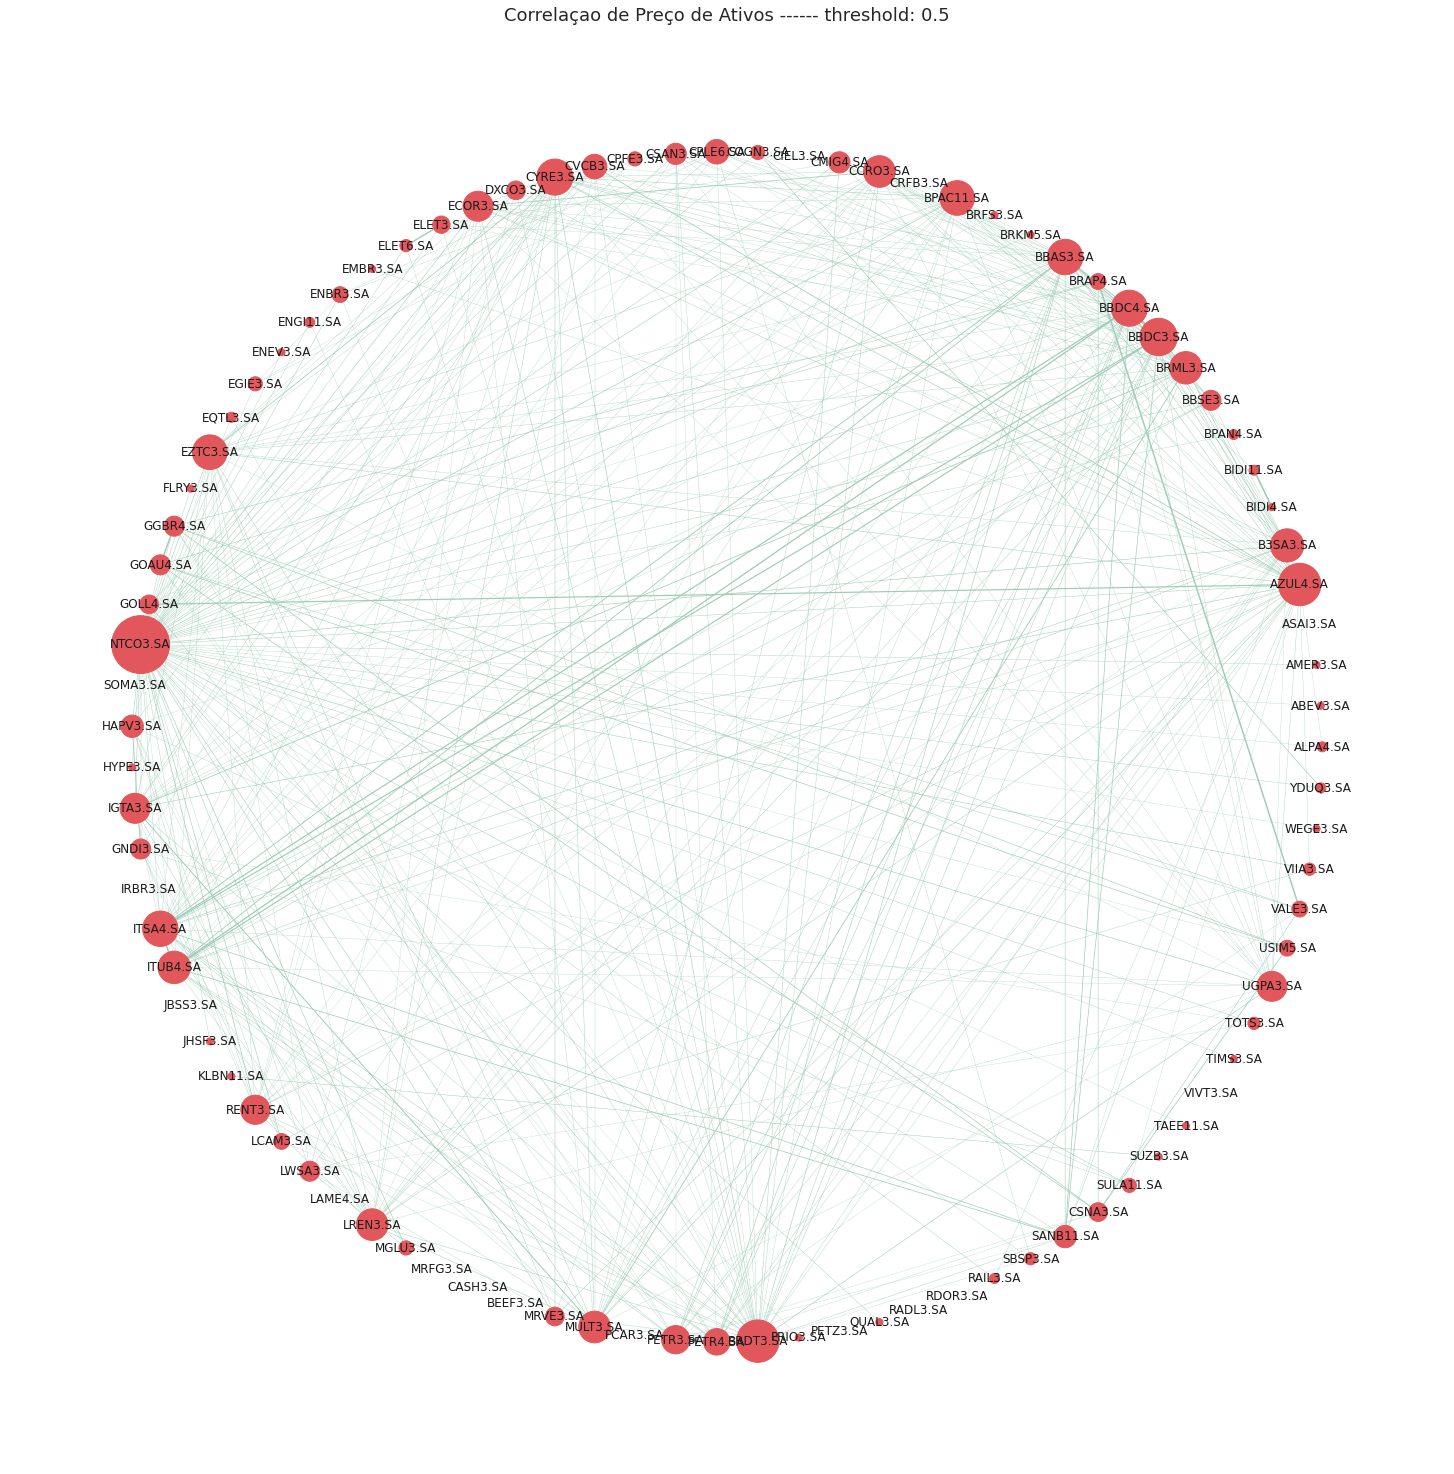

In [ ]:
# draw improved graph
sns.set(rc={'figure.figsize': (20, 20)})
font_dict = {'fontsize': 18}

nx.draw(Gx, pos=nx.circular_layout(Gx), with_labels=True,
        node_size=node_size, node_color="#e1575c", edge_color=edge_colours,
        width=edge_width)
plt.title("Correlaçao de Preço de Ativos ------ threshold: " + str(threshold), fontdict=font_dict)
plt.show()

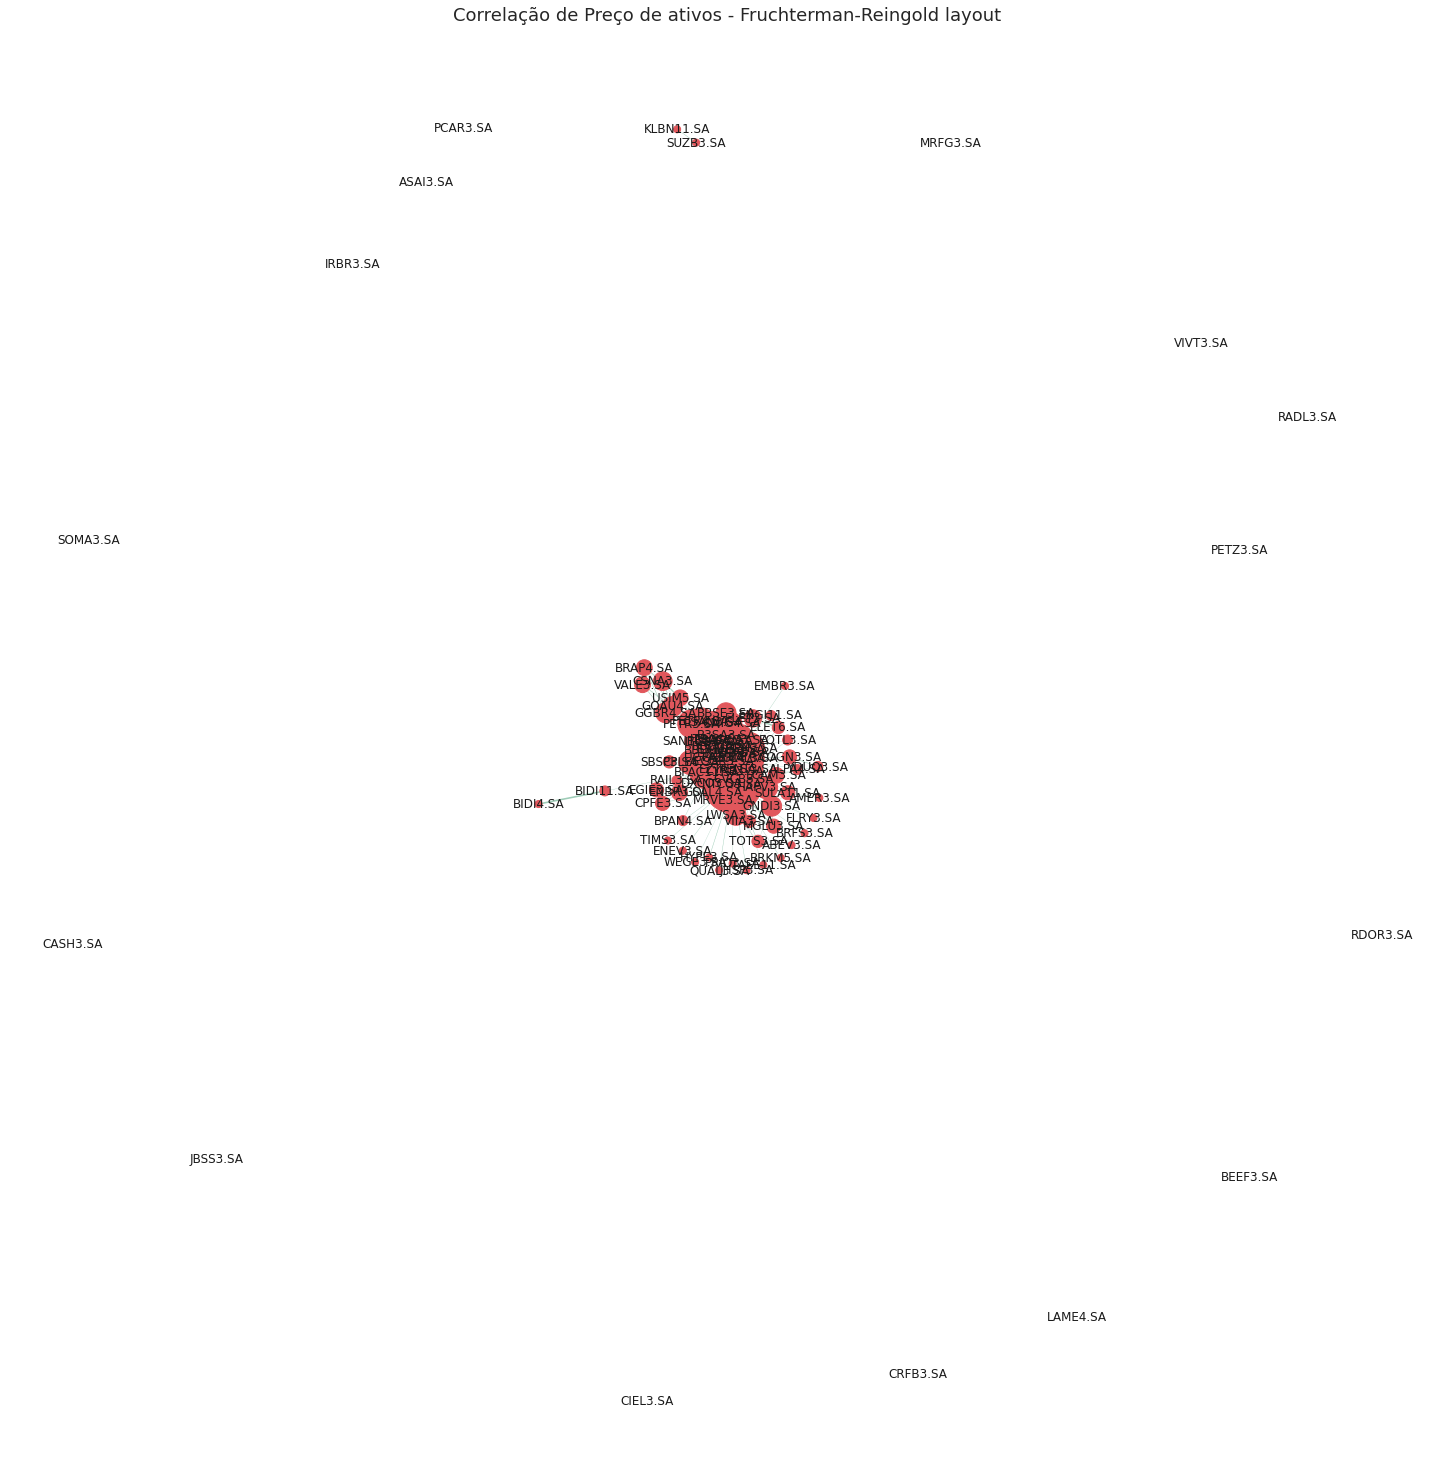

In [ ]:
# draw improved graph
nx.draw(Gx, pos=nx.fruchterman_reingold_layout(Gx), with_labels=True,
        node_size=node_size, node_color="#e1575c", edge_color=edge_colours,
       width = edge_width)
plt.title("Correlação de Preço de ativos - Fruchterman-Reingold layout",fontdict=font_dict)
plt.show()

O layout Fruchterman Reingold agrupou com sucesso os ativos em grupos de ativos fortemente correlacionados. Como visto antes na visualização do mapa de calor, existem grupos distintos de ativos que se comportam de forma semelhante entre si.

O algoritmo de Kruskal é usado para calcular a árvore de abrangência mínima e é bastante intuitivo. No entanto, Networkx tem uma função embutida que calcula a árvore de abrangência mínima para nós.

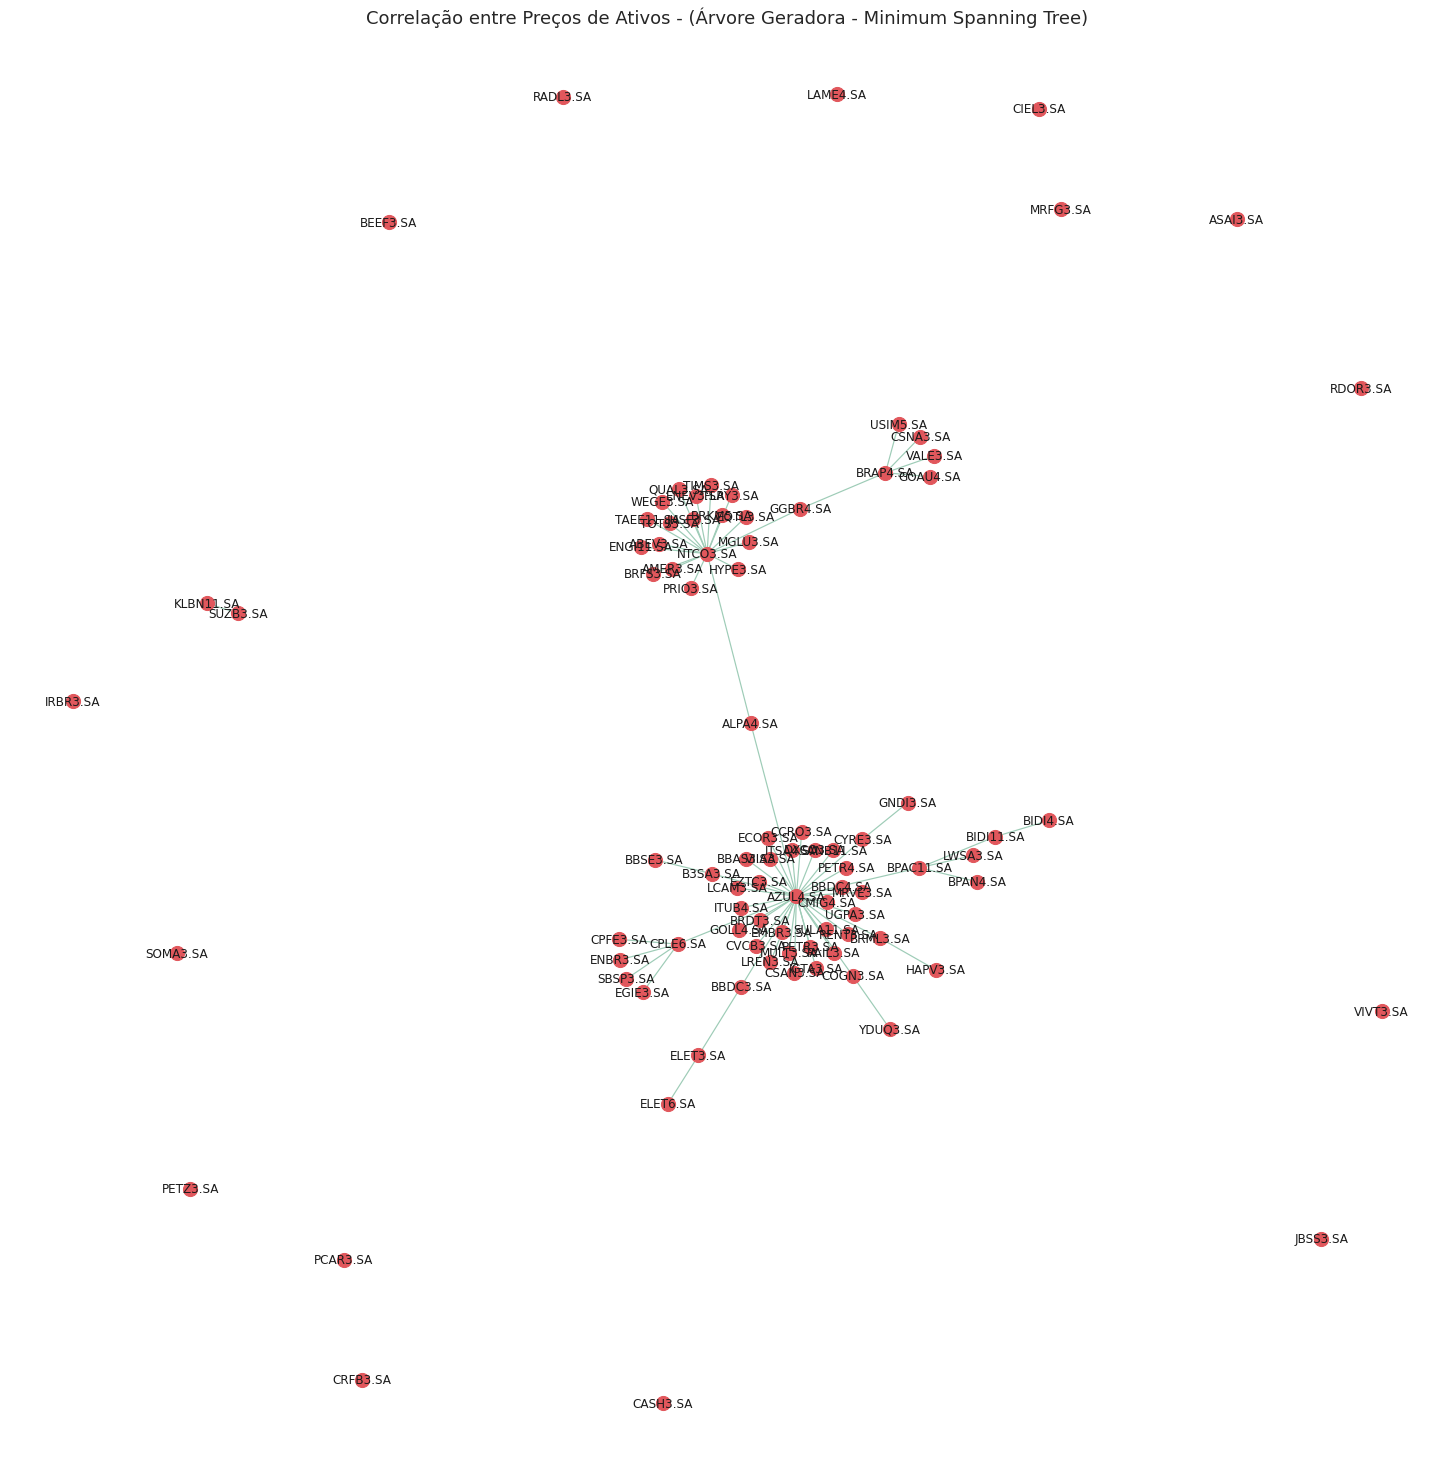

In [ ]:
#create minimum spanning tree layout from Gx (after small correlations have been removed)
mst = nx.minimum_spanning_tree(Gx)

edge_colours = []

#assign edge colours
for key, value in nx.get_edge_attributes(mst, 'correlation').items():
    edge_colours.append(assign_colour(value))

    
#draw minimum spanning tree. Set node size and width to constant
nx.draw(mst, with_labels=True, pos=nx.fruchterman_reingold_layout(mst),
        node_size=200, node_color="#e1575c", edge_color=edge_colours,
       width = 1.2)

#set title
plt.title("Correlação entre Preços de Ativos - (Árvore Geradora - Minimum Spanning Tree)",fontdict=font_dict)
plt.show()

#gráficos interativos

In [ ]:
def convert_rankings_to_string(ranking):
    """
    Concatenates list of node and correlation into a single string which is the 
    preferred format for the plotly tooltip.
    Inserts html "<br>" inbetween each item in order to add a new line in the tooltip
    """
    s = ''
    for r in ranking:
        s += r + "<br>"
    return s


def calculate_stats(returns=log_returns_df):
    """calculate annualised returns and volatility for all ETFs
   
    Output
    -------
    Outputs the annualised volatility and returns as a list of floats (for use in assigning node colours
    and sizes) and also as a lists of formatted strings to be used in the tool tips.    
    """
    
    #log returns are additive, 252 trading days
    annualized_returns = list(np.mean(returns)*252*100)
    
    annualized_volatility = [np.std(returns[col]*100)*(252**0.5)
                             for col in list(returns.columns)]

   
    # create string for tooltip
    annualized_volatility_2dp = ["Annualized Volatility: ""%.1f" % r + "%" for r in annualized_volatility]
    annualized_returns_2dp = ["Annualized Returns: ""%.1f" % r + "%" for r in annualized_returns]

    return annualized_volatility, annualized_returns, annualized_volatility_2dp, annualized_returns_2dp


def get_top_and_bottom_three(df=correlation_matrix):
    """
    get a list of the top 3 and bottom 3 most/least correlated assests
    for each node. 
    Parameters -> df - pandas correlation matrix
    Returns -> top_3_list : list of lists containing the top 3 correlations (name and value)
               bottom_3_list: list of lists containing the bottom three correlations (name and value)
    """

    top_3_list = []
    bottom_3_list = []

    for col in df.columns:

        # exclude self correlation #reverse order of the list returned
        top_3 = list(np.argsort(abs(df[col]))[-4:-1][::-1])
        # bottom 3 list is returned in correct order
        bottom_3 = list(np.argsort(abs(df[col]))[:3])

        # get column index
        col_index = df.columns.get_loc(col)

        # find values based on index locations
        top_3_values = [df.index[x] + ": %.2f" %
                        df.iloc[x, col_index] for x in top_3]
        bottom_3_values = [df.index[x] + ": %.2f" %
                           df.iloc[x, col_index] for x in bottom_3]

        top_3_list.append(convert_rankings_to_string(top_3_values))
        bottom_3_list.append(convert_rankings_to_string(bottom_3_values))

    return top_3_list, bottom_3_list

In [ ]:
def get_coordinates(G=mst):
    """Returns the positions of nodes and edges in a format for Plotly to draw the network"""
    # get list of node positions
    pos = nx.fruchterman_reingold_layout(mst)

    Xnodes = [pos[n][0] for n in mst.nodes()]
    Ynodes = [pos[n][1] for n in mst.nodes()]

    Xedges = []
    Yedges = []
    for e in mst.edges():
        # x coordinates of the nodes defining the edge e
        Xedges.extend([pos[e[0]][0], pos[e[1]][0], None])
        Yedges.extend([pos[e[0]][1], pos[e[1]][1], None])

    return Xnodes, Ynodes, Xedges, Yedges

In [ ]:
# ---------------------------------------
# Get statistics for tooltip
# ---------------------------------------

# make list of node labels.
node_label = list(mst.nodes())
# calculate annualised returns, annualised volatility and round to 2dp
annual_vol, annual_ret, annual_vol_2dp, annual_ret_2dp = calculate_stats()
# get top and bottom 3 correlations for each node
top_3_corrs, bottom_3_corrs = get_top_and_bottom_three()


# create tooltip string by concatenating statistics
description = [f"<b>{node}</b>" +
               "<br>" + annual_ret_2dp[index] +
               "<br>" + annual_vol_2dp[index] +
               "<br><br>Maiores correlações com: " +
               "<br>" + top_3_corrs[index] +
               "<br>Menores correlações com: "
               "<br>" + bottom_3_corrs[index]
               for index, node in enumerate(node_label)]


# ---------------------------------------
# Get poisitions of nodes and edges for Plotly graph
# ---------------------------------------

# get coordinates for nodes and edges
Xnodes, Ynodes, Xedges, Yedges = get_coordinates()


# ---------------------------------------
# Assign node colour and size depending on annualised returns
# ---------------------------------------

# assign node colour depending on positive or negative annualised returns
node_colour = [assign_colour(i) for i in annual_ret]

# assign node size based on annualised returns size (scaled by a factor)
node_size = [abs(x)**0.5*5 for x in annual_ret]

In [ ]:
# ---------------------------------------
# Plot graph
# ---------------------------------------

# edges
tracer = go.Scatter(x=Xedges, y=Yedges,
                    mode='lines',
                    line= dict(color='#DCDCDC', width=1),
                    hoverinfo='none',
                    showlegend=False)

# nodes
tracer_marker = go.Scatter(x=Xnodes, y=Ynodes,
                           mode='markers+text',
                           textposition='top center',
                           marker=dict(size=node_size,
                                            line=dict(width=1),
                                            color=node_colour),
                           hoverinfo='text',
                           hovertext=description,
                           text=node_label,
                           textfont=dict(size=7),
                           showlegend=False)


axis_style = dict(title='',
                  titlefont=dict(size=20),
                  showgrid=False,
                  zeroline=False,
                  showline=False,
                  ticks='',
                  showticklabels=False)


layout = dict(title='Plotly - interactive minimum spanning tree',
              width=1000,
              height=1000,
              autosize=False,
              showlegend=False,
              xaxis=axis_style,
              yaxis=axis_style,
              hovermode='closest',
             plot_bgcolor = '#fff')


fig = dict(data=[tracer, tracer_marker], layout=layout)

display(HTML("""<p>Node sizes are proportional to the size of annualised returns.<br>
                Node colours signify positive or negative returns since beginning of the timeframe.</p> """))
iplot(fig)

In [ ]:
#exportando gráfico para HTML
#atualizando layout
layout = dict(title='Plotly - interactive minimum spanning tree',
              width=2000,
              height=1000,
              autosize=False,
              showlegend=False,
              xaxis=axis_style,
              yaxis=axis_style,
              hovermode='closest',
             plot_bgcolor = '#fff')



fig = go.Figure(dict(data=[tracer, tracer_marker], layout=layout))
fig.write_html(file='grafico.html',full_html=False, include_plotlyjs='cdn')